In [1]:
import os
import os.path
import sys

In [2]:
sys.path.extend([os.path.expanduser("~/muram/python_codes"),
                 os.path.expanduser("~/hanlert/python"),
                 os.path.expanduser("~")])

In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import shutil

import muram
import hanlert
import muram2hanlert

In [4]:
%matplotlib inline

In [5]:
!cat ~/muram2hanlert/launch/every10.py

import os.path
import muram2hanlert as m2h

dir3D = os.path.expanduser("~/Pointers/MURaM4CSAC/3D")
jobroot = os.path.expanduser("~/muram2hanlert")
jobname = os.path.basename(__file__)[0:-3] # name of file, minus .py suffix
iteration = 18000
project = "P22100000"
email = "egeland@ucar.edu"

N = 153 # last is 1520; domain is 1535
start = 5
step = 10
for y in range(start, N*step, step):
    for z in range(start, N*step, step):
        m2h.prepare_job(dir3D, jobroot, jobname, iteration, y, z, project, email, N_ixs=140, sample=2, zerovel=True)
        m2h.start_job(jobroot, jobname, iteration, y, z)


In [29]:
# MURaM locations
dir2D = "/glade/p/hao/radmhd/rempel/SSD_CHR/dyn_25x16Mm_32_pdmp_1_zxy_tvd_low_eps/2D"
dir3D = "/glade/p/hao/radmhd/rempel/SSD_CHR/dyn_25x16Mm_32_pdmp_1_zxy_tvd_low_eps/3D"
iteration = 40000

In [69]:
#mu_file = "Stokes_1_1"; mu_desc = 'limb'
mu_file = "Stokes_5_1"; mu_desc = 'center'

In [62]:
# Load a FAL-C Ca II calculation
stokes_file = os.path.join(os.path.expanduser("~/hanlert/Outputs.opt6/B100.IRTCRD"), mu_file)
tmp = hanlert.io.read_stokes(stokes_file)
stk_falc = np.zeros((4, tmp['I'].size))
stk_falc[0] = tmp['I']
stk_falc[1] = tmp['Q/I']
stk_falc[2] = tmp['U/I']
stk_falc[3] = tmp['V/I']

In [10]:
def make_jobpath(jobroot, jobname, iteration, y, z):
    colpath = muram2hanlert.make_colpath(iteration, y, z)
    jobpath = os.path.join(jobroot, jobname, colpath)
    return jobpath

In [63]:
def load_m2h_stokes(jobroot, jobname, iteration, mu_file, N, start, step):
    jobpath = make_jobpath(jobroot, jobname, iteration, 0, 0)
    stokes = hanlert.io.read_stokes(os.path.join(jobpath, mu_file))
    stk_cube = np.ma.zeros((N, N, 4, stokes['I'].size))
    stk_cube.mask = np.zeros_like(stk_cube, dtype='bool')
    L = stokes['L']

    for y in range(start, N*step, step):
        for z in range(start, N*step, step):
            iy = int(y/step)
            iz = int(z/step)
            jobpath = make_jobpath(jobroot, jobname, iteration, y, z)
            stokes_file = os.path.join(jobpath, mu_file)
            if os.path.exists(stokes_file):
                stokes = hanlert.io.read_stokes(stokes_file)
                stk_cube[iy, iz, 0] = stokes['I']
                stk_cube[iy, iz, 1] = stokes['Q/I']
                stk_cube[iy, iz, 2] = stokes['U/I']
                stk_cube[iy, iz, 3] = stokes['V/I']
            else:
                stk_cube.mask[iy, iz, :] = True
                print(stokes_file, "does not exist, skipping")
    return L, stk_cube

In [64]:
jobroot = os.path.expanduser("/glade/p/hao/radmhd/csac")
jobname = 'hotcorona'
iteration = 40000
N = 192
start = 0
step = 4
L, stk_hotcorona = load_m2h_stokes(jobroot, jobname, iteration, mu_file, N, start, step)
stk_hotcorona_mean = np.mean(stk_hotcorona, axis=(0,1))

/glade/p/hao/radmhd/csac/hotcorona/iter_40000/Y_0008/Z_0748/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/hotcorona/iter_40000/Y_0012/Z_0748/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/hotcorona/iter_40000/Y_0016/Z_0180/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/hotcorona/iter_40000/Y_0028/Z_0240/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/hotcorona/iter_40000/Y_0028/Z_0420/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/hotcorona/iter_40000/Y_0032/Z_0244/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/hotcorona/iter_40000/Y_0036/Z_0284/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/hotcorona/iter_40000/Y_0064/Z_0328/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/hotcorona/iter_40000/Y_0072/Z_0264/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/hotcorona/iter_40000/Y_0076/Z_0156/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/hotcorona/iter_

In [66]:
jobroot = os.path.expanduser("/glade/p/hao/radmhd/csac")
jobname = 'every10'
iteration = 12000
N = 153
start = 0
step = 10
L, stk_every10 = load_m2h_stokes(jobroot, jobname, iteration, mu_file, N, start, step)
stk_every10_mean = np.mean(stk_every10, axis=(0,1))

/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0140/Z_0960/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0140/Z_0970/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0150/Z_0960/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0210/Z_0400/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0240/Z_0000/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0240/Z_0580/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0260/Z_0590/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0350/Z_0660/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0380/Z_0010/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0540/Z_0140/Stokes_5_1 does not exist, skipping
/glade/p/hao/radmhd/csac/every10/iter_12000/Y_0540/Z_1080/St

In [102]:
stk_every10_min = np.min(stk_every10, axis=(0,1))
stk_every10_q1 = np.percentile(stk_every10, 25, axis=(0,1))
stk_every10_med = np.percentile(stk_every10, 50, axis=(0,1))
stk_every10_q3 = np.percentile(stk_every10, 75, axis=(0,1))
stk_every10_max = np.max(stk_every10, axis=(0,1))

In [103]:
stk_hotcorona_min = np.min(stk_hotcorona, axis=(0,1))
stk_hotcorona_q1 = np.percentile(stk_hotcorona, 25, axis=(0,1))
stk_hotcorona_med = np.percentile(stk_hotcorona, 50, axis=(0,1))
stk_hotcorona_q3 = np.percentile(stk_hotcorona, 75, axis=(0,1))
stk_hotcorona_max = np.max(stk_hotcorona, axis=(0,1))

In [104]:
def plot_CaII(L, stokes, line='K', dL=0.1, title=None, save=False, close=False, fig=None, c='k', legend=None, **kwargs):
    """Plot Ca II 5-level lines H, K, IRT1, IRT2, IRT3    
    """
    
    # Line centers that were computed from minimum of I
    # TODO: recompute dynamically to handle Doppler shifts
    K = 393.477713
    H = 396.959134
    IRT1 = 850.035829
    IRT2 = 854.443791
    IRT3 = 866.452017

    selHK = (L >= K - dL) & (L <= H + dL)
    selKcore = (L >= (K - dL)) & (L <= (K + dL))
    selHcore = (L >= (H - dL)) & (L <= (H + dL))
    selIRT = (L >= IRT1 - dL) & (L <= IRT3 + dL)
    selIRT1 = (L >= IRT1 - dL) & (L <= IRT1 + dL)
    selIRT2 = (L >= IRT2 - dL) & (L <= IRT2 + dL)
    selIRT3 = (L >= IRT3 - dL) & (L <= IRT3 + dL)

    line_params = {'K': (selKcore, K), 
             'H': (selHcore, H),
             'IRT1': (selIRT1, IRT1),
             'IRT2': (selIRT2, IRT2), 
             'IRT3': (selIRT3, IRT3)}
    sel, center = line_params[line]
    label = line
    
    ticks = np.linspace(center - dL, center + dL, 5)
    if fig is None:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 8.5))
    else:
        ax1, ax2, ax3, ax4 = fig.axes
    ax1.plot(L[sel], stokes[0][sel], c=c, **kwargs)
    ax2.plot(L[sel], stokes[3][sel], c=c, label=legend, **kwargs)
    ax3.plot(L[sel], stokes[1][sel], c=c, **kwargs)
    ax4.plot(L[sel], stokes[2][sel], c=c, **kwargs)

    ax1.set_ylabel("I")
    ax2.set_ylabel("V/I")
    ax3.set_ylabel("Q/I")
    ax4.set_ylabel("U/I")
    for ax in (ax1, ax2, ax3, ax4):
        ax.set_xticks(ticks)
        ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
        ax.set_xlabel('Wavelength [nm]')
        
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    if title is not None:
        fig.suptitle(title + ' ' + label, size=16)
    else:
        fig.suptitle(label, size=16)
        
    if legend is not None:
        ax2.legend(loc='upper right')    
    
    if save:
        fig.savefig(label+'_'+save+".pdf", bbox_inches='tight')
    if close:
        plt.close(fig)
    return fig

In [105]:
def plot_CaII_Idist(L, stokes, fillrange=None, min=None, max=None, line='K', dL=0.1, title=None, save=False, close=False, fig=None, c='k', legend=None, **kwargs):
    """Plot Ca II 5-level lines H, K, IRT1, IRT2, IRT3    
    """
    
    # Line centers that were computed from minimum of I
    # TODO: recompute dynamically to handle Doppler shifts
    K = 393.477713
    H = 396.959134
    IRT1 = 850.035829
    IRT2 = 854.443791
    IRT3 = 866.452017

    selHK = (L >= K - dL) & (L <= H + dL)
    selKcore = (L >= (K - dL)) & (L <= (K + dL))
    selHcore = (L >= (H - dL)) & (L <= (H + dL))
    selIRT = (L >= IRT1 - dL) & (L <= IRT3 + dL)
    selIRT1 = (L >= IRT1 - dL) & (L <= IRT1 + dL)
    selIRT2 = (L >= IRT2 - dL) & (L <= IRT2 + dL)
    selIRT3 = (L >= IRT3 - dL) & (L <= IRT3 + dL)

    line_params = {'K': (selKcore, K), 
             'H': (selHcore, H),
             'IRT1': (selIRT1, IRT1),
             'IRT2': (selIRT2, IRT2), 
             'IRT3': (selIRT3, IRT3)}
    sel, center = line_params[line]
    label = line
    
    ticks = np.linspace(center - dL, center + dL, 5)
    if fig is None:
        fig, ax1 = plt.subplots(figsize=(11, 8.5))
    else:
        (ax1,) = fig.axes
    ax1.plot(L[sel], stokes[0][sel], c=c, label=legend, **kwargs)
    
    if fillrange is not None:
        lo, hi = fillrange
        ax1.fill_between(L[sel], lo[0][sel], hi[0][sel], color=c, alpha=0.2)
        
    if min is not None:
        ax1.plot(L[sel], min[0][sel], color=c, ls=':')    
    
    if max is not None:
        ax1.plot(L[sel], max[0][sel], color=c, ls=':')

    ax1.set_ylabel("I")

    ax1.set_xticks(ticks)
    ax1.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))
    ax1.set_xlabel('Wavelength [nm]')
        
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    if title is not None:
        fig.suptitle(title + ' ' + label, size=16)
    else:
        fig.suptitle(label, size=16)
        
    if legend is not None:
        ax1.legend(loc='upper right')    
    
    if save:
        fig.savefig(label+'_'+save+".pdf", bbox_inches='tight')
    if close:
        plt.close(fig)
    return fig

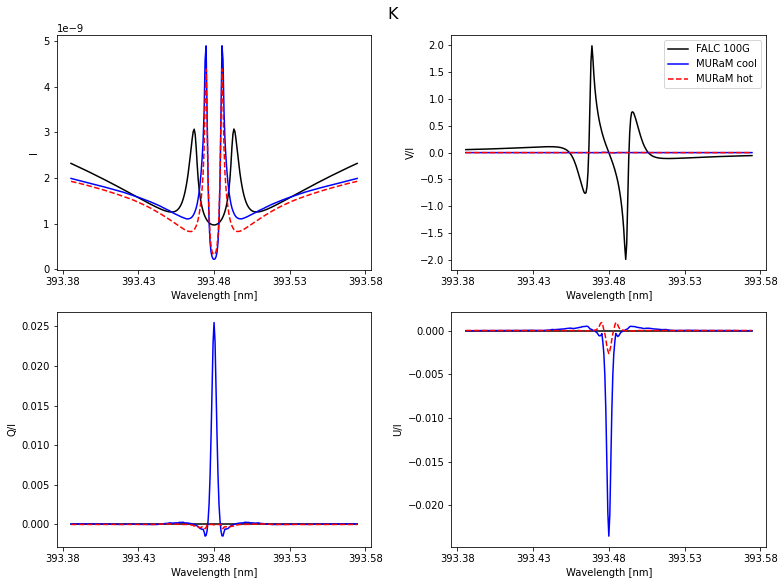

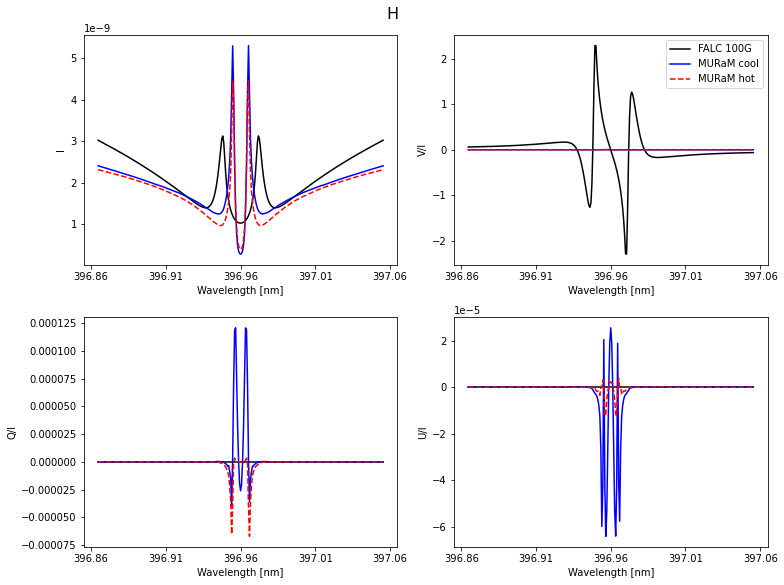

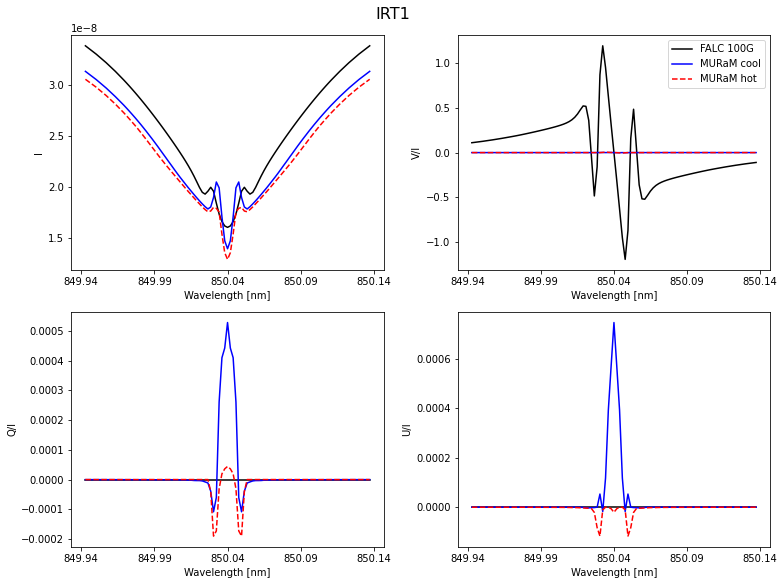

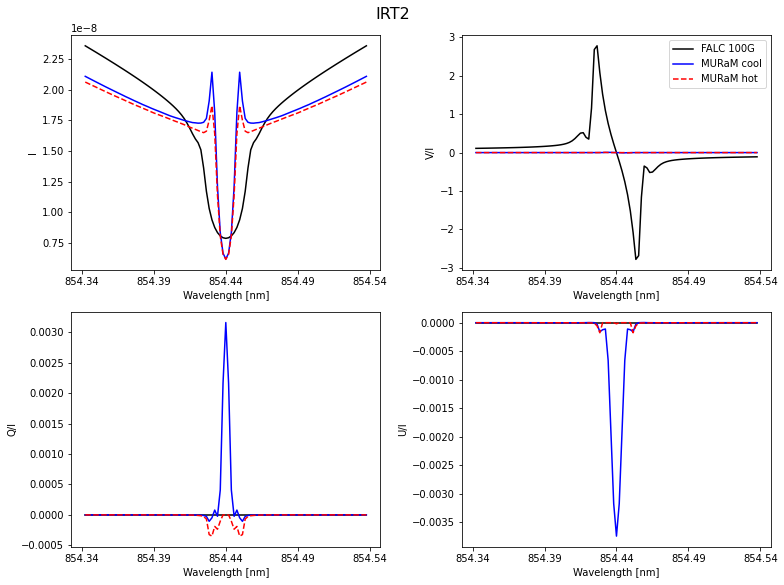

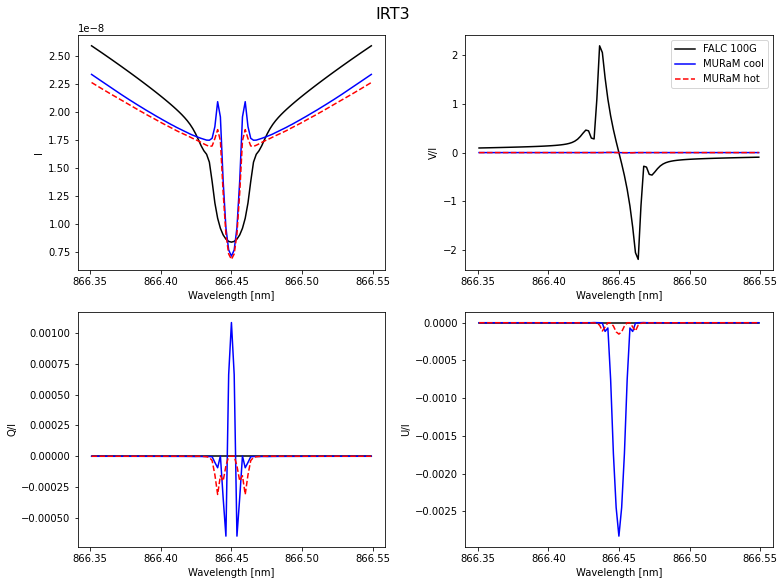

In [106]:
dL = 0.1
for line in ('K', 'H', 'IRT1', 'IRT2', 'IRT3'):
    fig = plot_CaII(L, stk_falc, line=line, c='k', dL=dL, legend='FALC 100G');
    plot_CaII(L, stk_every10_med, line=line, c='b', dL=dL, fig=fig, legend='MURaM cool');
    plot_CaII(L, stk_hotcorona_med, line=line, c='r', ls='--', dL=dL, fig=fig, legend='MURaM hot');
    fig.savefig(f'cold_vs_hot_stokes_{line}_{mu_desc}.pdf')

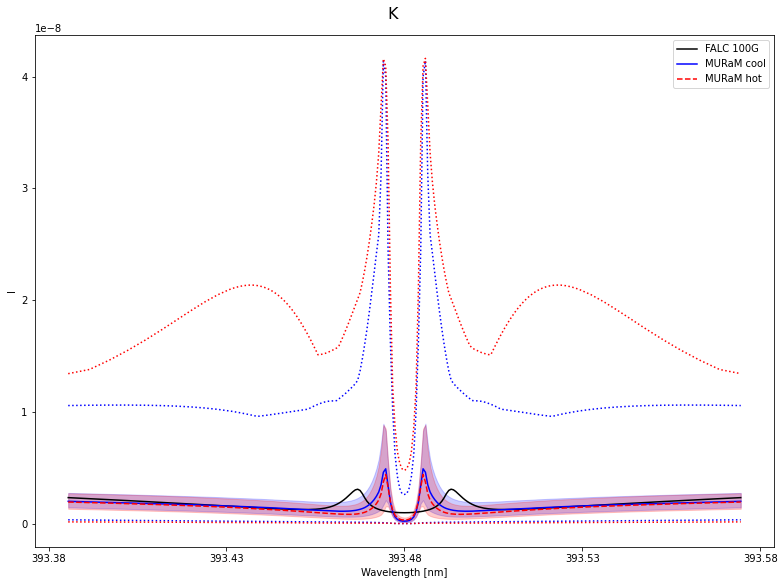

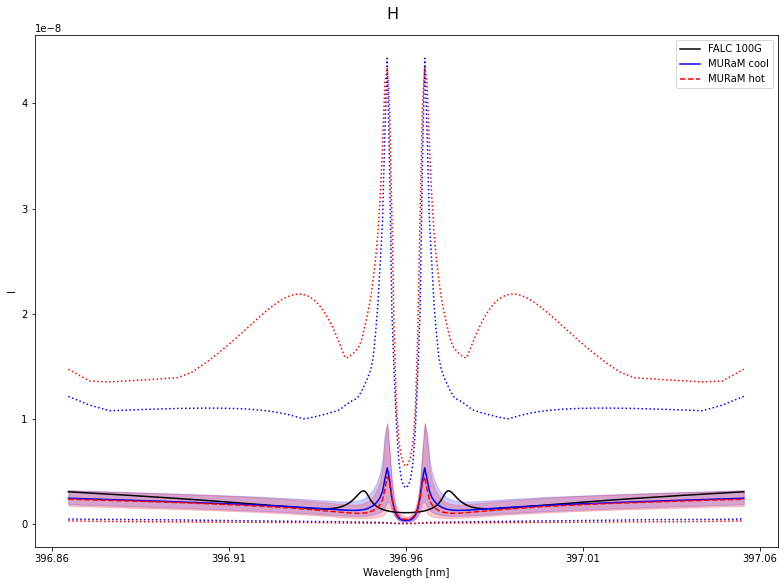

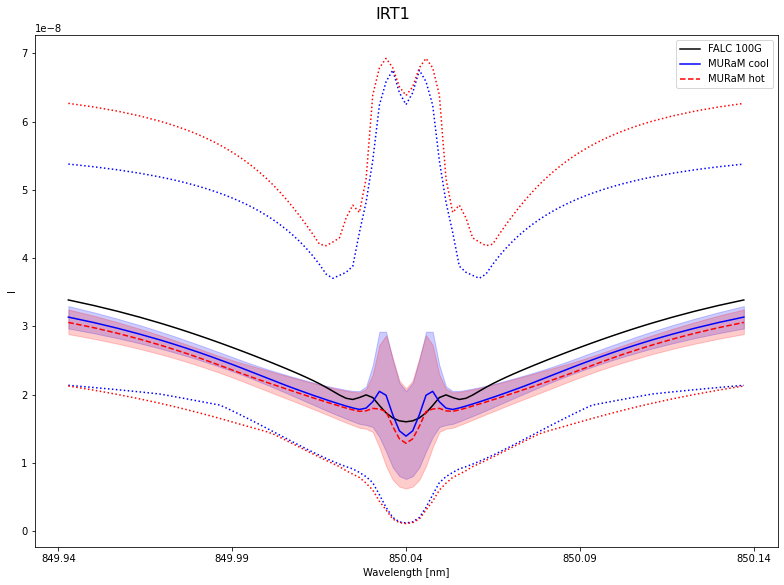

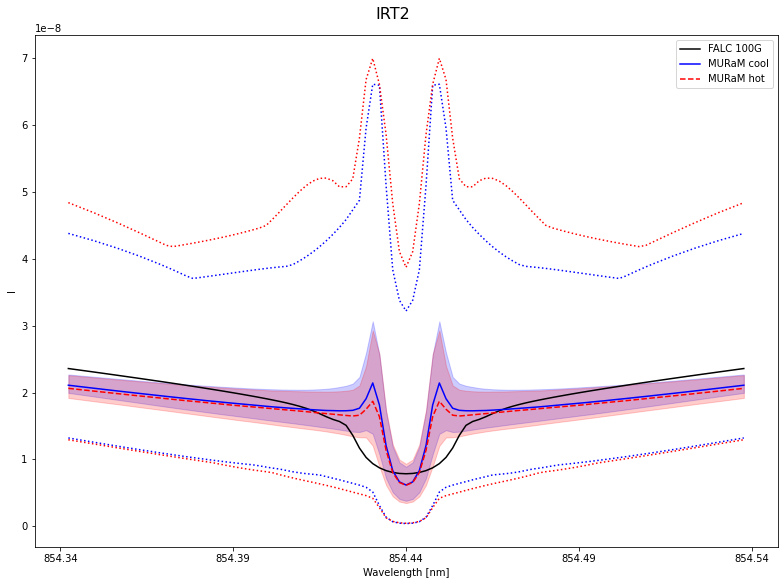

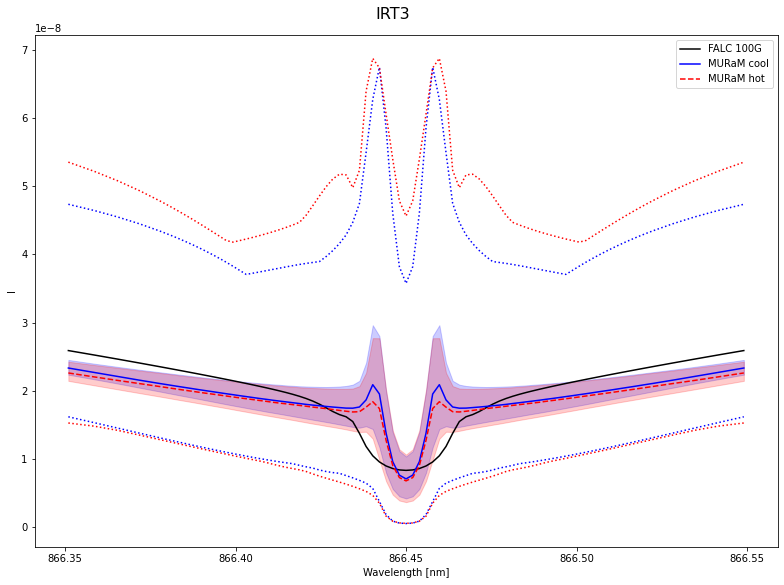

In [108]:
dL = 0.1
for line in ('K', 'H', 'IRT1', 'IRT2', 'IRT3'):
    fig = plot_CaII_Idist(L, stk_falc, line=line, c='k', dL=dL, legend='FALC 100G');
    plot_CaII_Idist(L, stk_every10_med, fillrange=(stk_every10_q1, stk_every10_q3), min=stk_every10_min, max=stk_every10_max, line=line, c='b', dL=dL, fig=fig, legend='MURaM cool');
    plot_CaII_Idist(L, stk_hotcorona_med, fillrange=(stk_hotcorona_q1, stk_hotcorona_q3), min=stk_hotcorona_min, max=stk_hotcorona_max,line=line, c='r', ls='--', dL=dL, fig=fig, legend='MURaM hot');
    fig.savefig(f'cold_vs_hot_Idist_{line}_{mu_desc}.pdf')